# 作業
### 用 digits (3個數字即可 , dataset.load_digits(n_class=3)) 資料嘗試跑 PCA


In [1]:
from sklearn import datasets

digits = datasets.load_digits(n_class=3)
X = digits.data
y = digits.target

載入 相關套件 並 執行 PCA 實驗 ...

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [2]:
digits = datasets.load_digits(n_class=3)
X = digits.data
y = digits.target

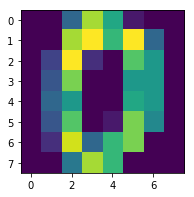

In [3]:
dim = np.sqrt(X.shape[1]).astype(np.int)
img_dim = (dim, dim)

plt.figure(figsize=(3, 3))
plt.imshow(X[0, :].reshape(img_dim))
plt.show()

In [4]:
mm_scaler = MinMaxScaler()

In [5]:
scaling_X = mm_scaler.fit_transform(X)

In [6]:
n_com = 2
pca = PCA(n_components=n_com)
reduction_X = pca.fit_transform(scaling_X)

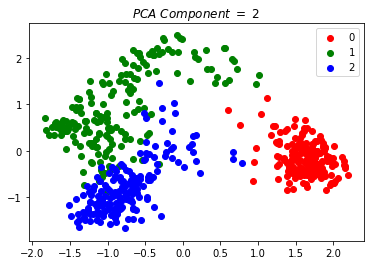

In [7]:
color_map = {0: 'r', 1: 'g', 2: 'b'}
for label in np.unique(y):
    plt.scatter(reduction_X[y==label, 0], reduction_X[y==label,1],
                c=color_map[label], label=label)
plt.title('$PCA\ Component\ =\ {}$'.format(n_com))
plt.legend()
plt.show()

In [8]:
n_com = 3
pca = PCA(n_components=n_com)
reduction_X = pca.fit_transform(scaling_X)

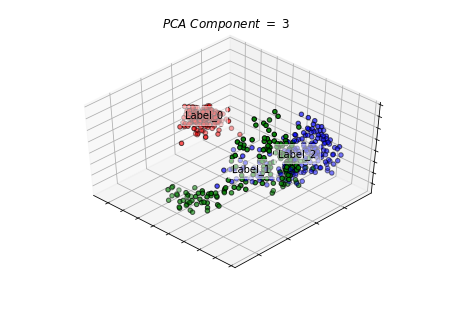

In [9]:
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=48, azim=134)
c_map = [color_map[label] for label in y]

for label in np.unique(y):
    ax.text3D(reduction_X[y==label, 0].mean(),
              reduction_X[y==label, 1].mean(),
              reduction_X[y==label, 2].mean(),
              s='Label_' + str(label),
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
ax.scatter(reduction_X[:, 0], reduction_X[:, 1], reduction_X[:, 2], c=c_map,
           edgecolor='k')

ax.set_title('$PCA\ Component\ =\ {}$'.format(n_com))
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.dist = 12
plt.show()